## Blinded cameras clustering

Here the dataset is a pandas DataFrame generated from a response.drdf file. 
The file can be found at "/storage/gpfs_data/neutrino/SAND-LAr/SAND-LAr-GRAIN-CALORIMETRY/data/cube_production/production1/cube_X0_Y0_Z-3/output/response_cut.drdf".

In [58]:
import os 
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt 
from sklearn.cluster import KMeans

### Read data from pickle format

In [59]:
#module_path = os.path.abspath(os.path.join('..'))
df = pd.read_pickle("blind_cameras_dataset\\drdf_arrays.pkl")
print(df[:5])

  event     source                                             pixels
0  1115  CAM_NB_X0  [[1.034386, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
1  1115  CAM_NB_X1  [[2.8447123, 1.9851313, 1.191889, 0.0, 1.02277...
2  1115  CAM_NB_X2  [[0.0, 0.0, 2.0428712, 1.8089218, 1.1883966, 0...
3  1115  CAM_NB_X3  [[3.2495024, 4.1333947, 3.7861702, 0.0, 0.0, 0...
4  1115  CAM_NB_X4  [[0.0, 0.0, 0.0, 1.105229, 2.885855, 0.0, 1.99...


Compose data array from dataframe column, keeping different cameras in the rows, while columns represent the pixels

In [60]:
df2arr = df.pixels.to_numpy()
arr3d = np.stack(df2arr)
data = arr3d.reshape(df2arr.shape[0],32*32)

print('data array with shape:',df2arr.shape)

data array with shape: (46968,)


In [61]:
# if supervised algorithm, need to create labe array
# data_label = .....

In [62]:
# NB this os the proof of how the reshape method works!!
# t0 = test[0]
# t1 = test1[0]
# d = np.empty(0)
# for i in range(32):
#     for j in range(32):
#         diff = t0[i,j] - t1[i*32+j]
#         d = np.append(d,diff)
        
# print(np.min(d), np.max(d))

### Show distribution of data from the entire file

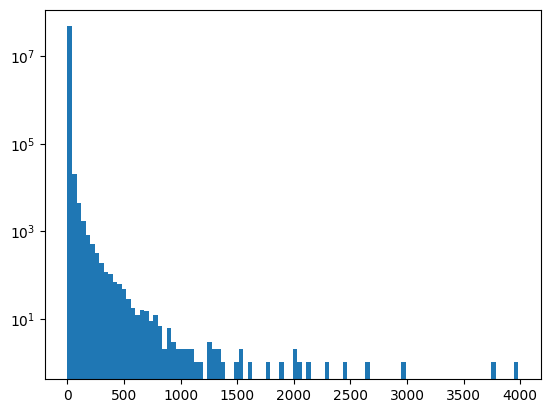

In [63]:
plt.hist(data.reshape(-1,1),100)
plt.yscale('log')

#### Find cameras with an excess of photons *
NB. this excess must be defined using some algorithm

In [64]:
tw = np.where(data>50)
blind_candidate = np.unique(tw[0])
print('cameras with excess photons: ', blind_candidate.size)
#print(blind_candidate)

cameras with excess photons:  527


### Plot photon distribution for 1 camera

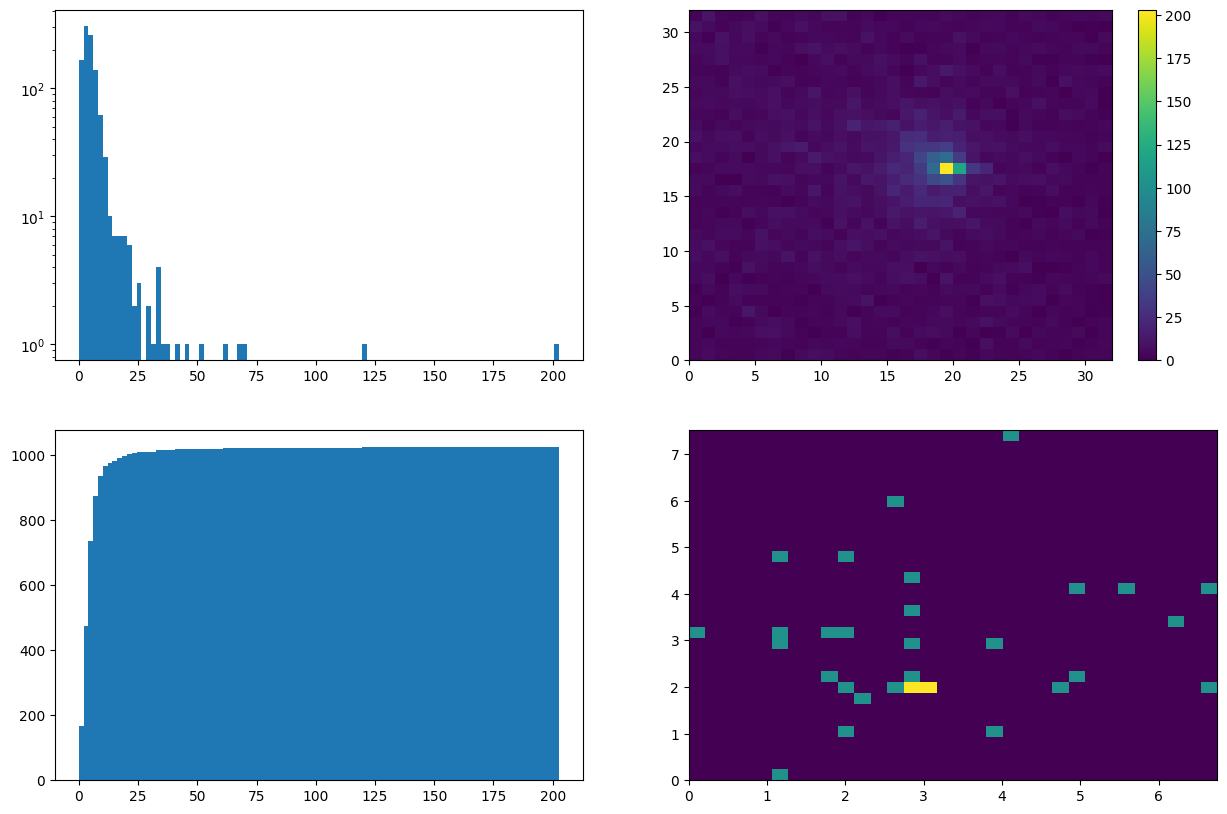

In [65]:
data_num = 58

fig, ax = plt.subplots(2,2)
ax[0,0].hist(data[data_num],100)
ax[0,0].set_yscale('log')

camera = np.reshape(df.iloc[162].pixels, (32,32))
cam = ax[0,1].pcolormesh(arr3d[data_num])
plt.colorbar(cam)

ax[1,0].hist(data[data_num], 100, cumulative=True)

ax[1,1].hist2d(arr3d[data_num][0],arr3d[data_num][1],32)

fig.set_figwidth(15)
fig.set_figheight(10)

### Use the KMean algorithm to clusterise the datasample.
The same data are the processed to check the clusterization.

In [66]:
# Declaring Model
model = KMeans(n_clusters=2)

# Fitting Model
model.fit(data)

# Prediction on the entire data
all_predictions = model.predict(data)
blind_predicted = np.where(all_predictions == 1)

print('not blind :',np.count_nonzero(all_predictions == 0),'over',all_predictions.size)
print('predicted blind :',np.count_nonzero(all_predictions == 1),'over',all_predictions.size)
#print(blind_predicted)

not blind : 46883 over 46968
predicted blind : 85 over 46968


In [67]:
blind_in_common = np.intersect1d(blind_candidate, blind_predicted[0])
print('common blind =', blind_in_common.size,'out of',blind_predicted[0].size, 'predicted.\nCandidates were',blind_candidate.size)

# Find which of the predicted bind_cameras is not in the blind_candidate array i.e. probaly is a false positive
blind_not_in_common = np.setdiff1d(blind_predicted[0], blind_in_common, assume_unique=True) #returns the value in arr1 which are not in arr2
print('not in common :',blind_not_in_common)

common blind = 83 out of 85 predicted.
Candidates were 527
not in common : [19169 31557]


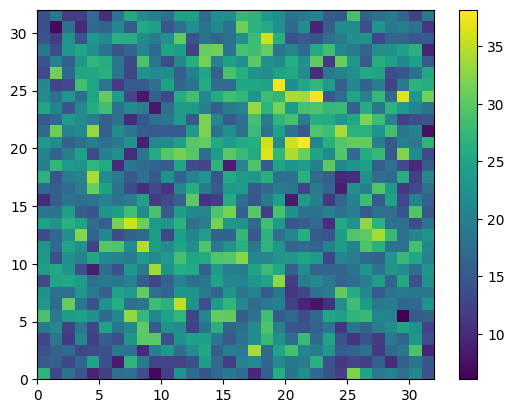

In [68]:
camera = np.reshape(df.iloc[31557].pixels, (32,32))
plt.pcolormesh(camera)
plt.colorbar()